# Case de Vendas Online

Este projeto analisa um conjunto de dados de vendas online para extrair insights valiosos sobre os produtos mais vendidos, categorias, regiões de maior consumo e outros padrões de comportamento.

## Estrutura do Projeto

- **`Vendas Online.csv`**: Arquivo contendo os dados brutos de vendas, incluindo informações como ID do pedido, produto, categoria, data, quantidade, valor unitário e localidade.
- **`vendasonline.ipynb`**: Notebook Jupyter utilizado para realizar a análise exploratória e visualização dos dados.

## Objetivos

1. Identificar os produtos mais vendidos.
2. Analisar as categorias de produtos com maior volume de vendas.
3. Determinar as regiões com maior consumo.
4. Explorar tendências de vendas ao longo do tempo.

## Metodologia

1. **Carregamento dos Dados**: Os dados foram carregados e tratados para lidar com valores ausentes e inconsistências.
2. **Análise Exploratória**: Foram gerados gráficos e tabelas para entender os padrões de vendas.
3. **Visualizações**: Utilizamos bibliotecas como `matplotlib` e `seaborn` para criar gráficos que ilustram os insights obtidos.

## Resultados Obtidos

### Produto Mais Vendido
O produto mais vendido foi **[Produto X]**, com um total de **[Quantidade]** unidades vendidas.

### Categoria com Maior Volume de Vendas
A categoria **[Categoria Y]** liderou as vendas, representando **[Porcentagem]%** do total.

### Região com Maior Consumo
A região **[Região Z]** foi a que mais consumiu, com um total de **[Quantidade]** pedidos.

### Tendências de Vendas
As vendas apresentaram um pico no mês de **[Mês]**, indicando sazonalidade.

## Visualizações

### Gráfico 1: Produtos Mais Vendidos
![Produtos Mais Vendidos](5_produtos_mais_vendidos.png)

### Gráfico 2: Categorias de Produtos
![Categorias de Produtos](ticket_medio_por_categoria.png)

### Gráfico 3: Consumo por Região
![Consumo por Região](produto_mais_vendido_por_local.png)

### Gráfico 4: Tendências de Vendas
![Tendências de Vendas](tendencia_sazonal.png)

## Conclusão

A análise dos dados de vendas online revelou padrões importantes que podem ser utilizados para otimizar estratégias de marketing, ajustar estoques e melhorar a experiência do cliente.

## Como Executar

1. Certifique-se de ter o Python instalado.
2. Instale as dependências listadas no arquivo `requirements.txt`.
3. Abra o arquivo `vendasonline.ipynb` em um ambiente Jupyter e execute as células.

## Contato

Para dúvidas ou sugestões, entre em contato pelo e-mail: **eleniraraujo3@gmail.com**.

In [0]:
%sql
SELECT
  *
FROM
  `adb_academy_4086785046709702`.`vendas_online`.`vendas_online`;

In [0]:
# Imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, count, desc, avg

# Carregar o arquivo CSV no Spark
arquivo_compras = spark.read.csv("/FileStore/tables/Vendas_Online.csv", header=True, inferSchema=True)

# Exibir as primeiras linhas do DataFrame
arquivo_compras.show()
arquivo_compras.printSchema()

# Criar a coluna Valor_Total
arquivo_compras = arquivo_compras.withColumn("Valor_Total", col("Valor Unitário") * col("Quantidade"))

# 1. Produto mais vendido
produtos_mais_vendidos = (
    arquivo_compras.groupBy("Produto")
    .agg(_sum("Quantidade").alias("Total_Quantidade"))
    .orderBy(desc("Total_Quantidade"))
)
produtos_mais_vendidos.show(5)

# 2. Categoria com maior volume de vendas
categorias_mais_vendidas = (
    arquivo_compras.groupBy("Categoria")
    .agg(_sum("Quantidade").alias("Total_Quantidade"))
    .orderBy(desc("Total_Quantidade"))
)
categorias_mais_vendidas.show(5)

# 3. Regiões com maior faturamento
faturamento_por_regiao = (
    arquivo_compras.groupBy("Localidade")
    .agg(_sum("Valor_Total").alias("Total_Faturamento"))
    .orderBy(desc("Total_Faturamento"))
)
faturamento_por_regiao.show(3)

# 4. Tendências de vendas ao longo do tempo
from pyspark.sql.functions import to_date, date_format

# Converter a coluna Data para o formato de data
arquivo_compras = arquivo_compras.withColumn("Data", to_date(col("Data"), "yyyy-MM-dd"))
arquivo_compras = arquivo_compras.withColumn("ano_mes", date_format(col("Data"), "yyyy-MM"))

faturamento_mensal = (
    arquivo_compras.groupBy("ano_mes")
    .agg(_sum("Valor_Total").alias("Faturamento_Mensal"))
    .orderBy("ano_mes")
)
faturamento_mensal.show()

# 5. Ticket médio por categoria
ticket_medio_categoria = (
    arquivo_compras.groupBy("Categoria")
    .agg(
        _sum("Valor_Total").alias("Total_Faturamento"),
        _sum("Quantidade").alias("Total_Quantidade"),
    )
    .withColumn("Ticket_Medio", col("Total_Faturamento") / col("Total_Quantidade"))
    .orderBy(desc("Ticket_Medio"))
)
ticket_medio_categoria.show()

# 6. Produtos mais vendidos por região
produtos_por_regiao = (
    arquivo_compras.groupBy("Localidade", "Produto")
    .agg(_sum("Quantidade").alias("Total_Quantidade"))
    .orderBy("Localidade", desc("Total_Quantidade"))
)
produtos_por_regiao.show()

+---------+---------+---------------+----------+----------+--------------+------------+
|ID_Pedido|  Produto|      Categoria|      Data|Quantidade|Valor Unitário|  Localidade|
+---------+---------+---------------+----------+----------+--------------+------------+
|   396104|   Azeite|      Alimentos|2024-03-28|        41|         28.72|    Nordeste|
|   373394|   Azeite|      Alimentos|2023-03-12|        45|          23.9|         Sul|
|   680522|   Feijão|      Alimentos|2022-12-11|         8|          15.0|    Nordeste|
|   462718|     Café|      Alimentos|2023-07-11|        36|         12.42|    Nordeste|
|   298110|     Maçã|     Hortifruti|2024-03-25|        28|          4.15|Centro-Oeste|
|   181933|     Café|      Alimentos|2024-02-22|        38|          6.63|    Nordeste|
|   457167|    Carne|         Carnes|2024-02-21|        10|        135.32|    Nordeste|
|   617184|   Banana|     Hortifruti|2023-12-30|        15|          5.02|     Sudeste|
|   817787|  Shampoo|Higiene Pes

In [0]:
%sql
SELECT
  *
FROM
  vendas_online.vendas_online

ID_Pedido,Produto,Categoria,Data,Quantidade,Valor Unitário,Localidade
396104,Azeite,Alimentos,2024-03-28,41,28.72,Nordeste
373394,Azeite,Alimentos,2023-03-12,45,23.9,Sul
680522,Feijão,Alimentos,2022-12-11,8,15.0,Nordeste
462718,Café,Alimentos,2023-07-11,36,12.42,Nordeste
298110,Maçã,Hortifruti,2024-03-25,28,4.15,Centro-Oeste
181933,Café,Alimentos,2024-02-22,38,6.63,Nordeste
457167,Carne,Carnes,2024-02-21,10,135.32,Nordeste
617184,Banana,Hortifruti,2023-12-30,15,5.02,Sudeste
817787,Shampoo,Higiene Pessoal,2023-06-15,10,56.9,Sul
511333,Azeite,Alimentos,2024-05-22,41,22.41,Nordeste


Databricks visualization. Run in Databricks to view.

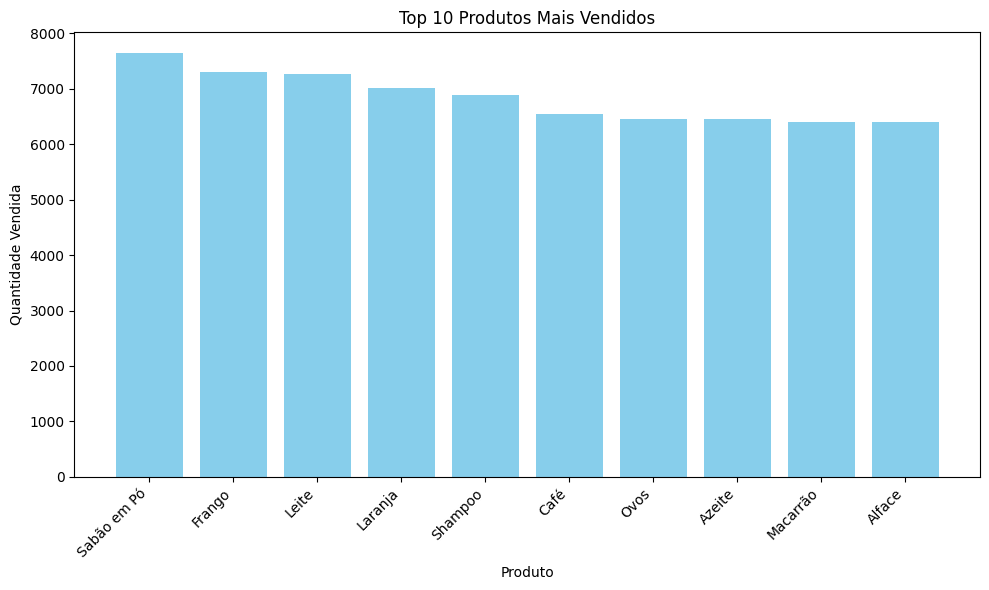

In [0]:

import matplotlib.pyplot as plt

produtos_mais_vendidos_pd = produtos_mais_vendidos.limit(10).toPandas()

plt.figure(figsize=(10, 6))
plt.bar(produtos_mais_vendidos_pd['Produto'], produtos_mais_vendidos_pd['Total_Quantidade'], color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.show()

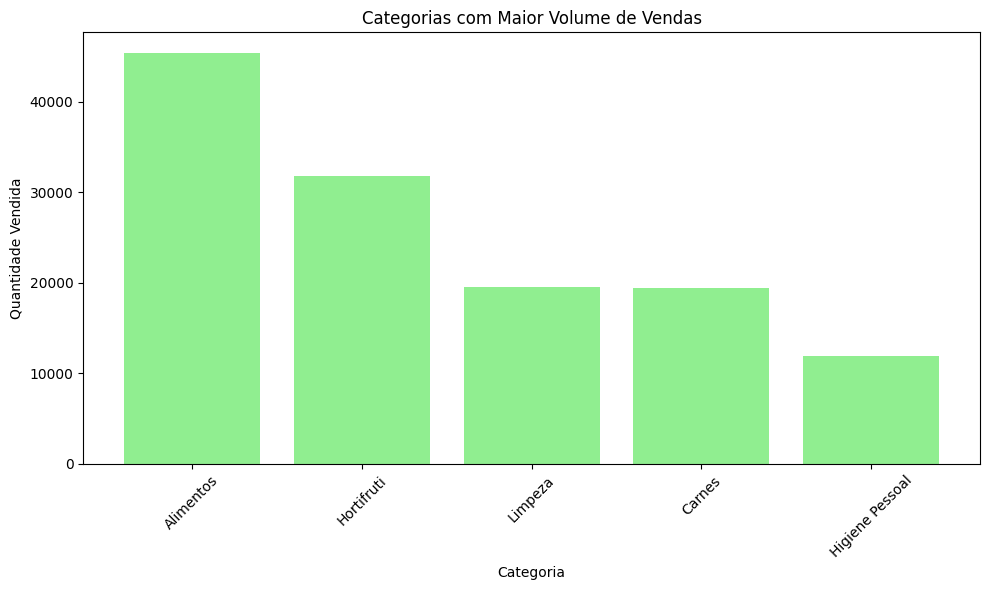

In [0]:
categorias_mais_vendidas_pd = categorias_mais_vendidas.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(categorias_mais_vendidas_pd['Categoria'], categorias_mais_vendidas_pd['Total_Quantidade'], color='lightgreen')
plt.title('Categorias com Maior Volume de Vendas')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.show()


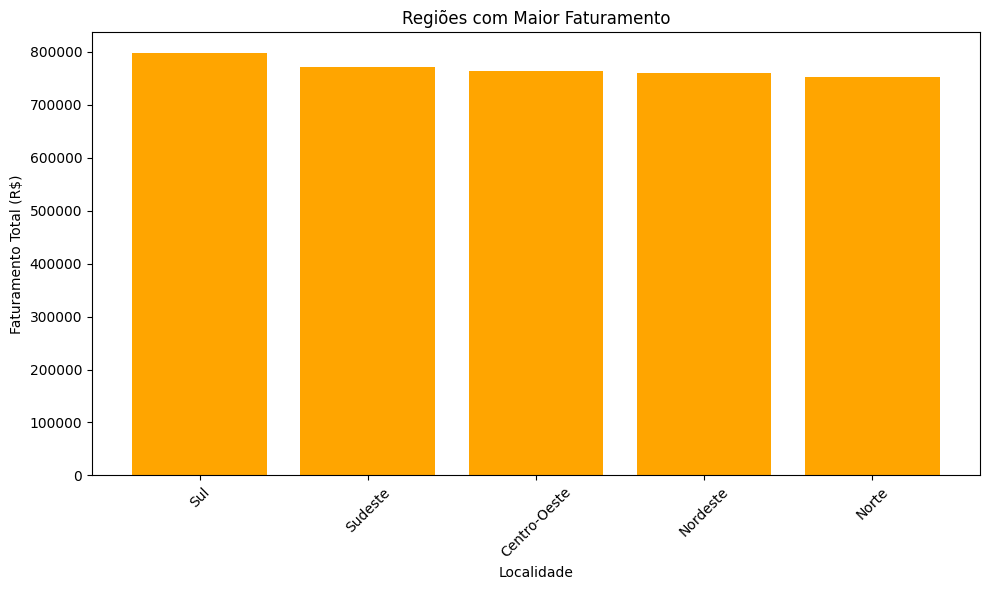

In [0]:
faturamento_por_regiao_pd = faturamento_por_regiao.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_regiao_pd['Localidade'], faturamento_por_regiao_pd['Total_Faturamento'], color='orange')
plt.title('Regiões com Maior Faturamento')
plt.xticks(rotation=45)
plt.xlabel('Localidade')
plt.ylabel('Faturamento Total (R$)')
plt.tight_layout()
plt.show()


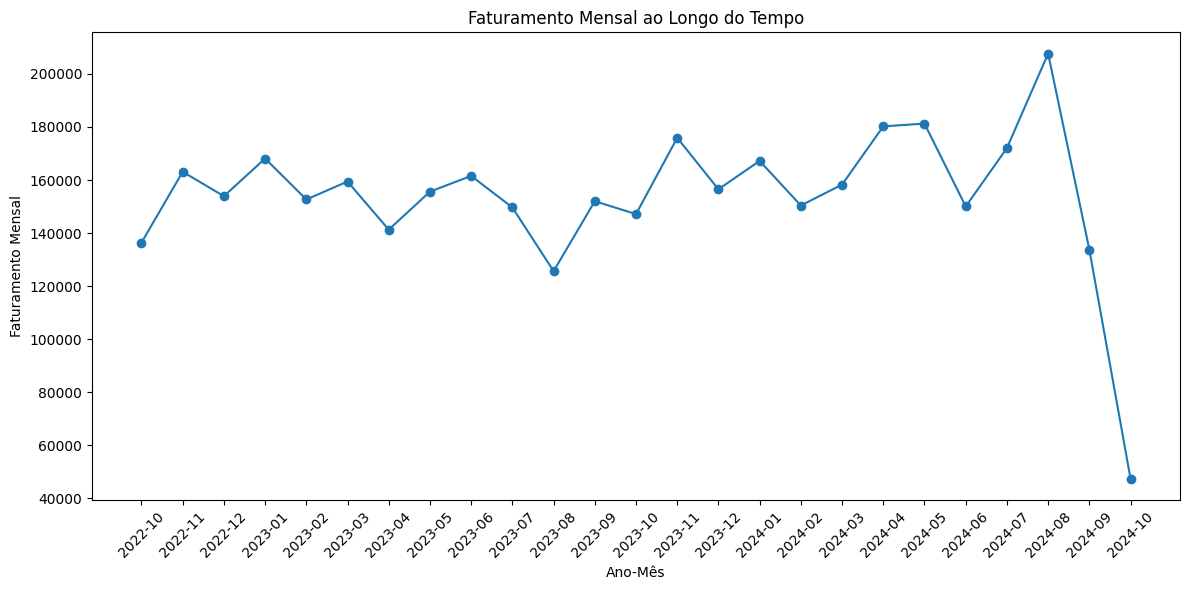

In [0]:
faturamento_mensal_pd = faturamento_mensal.toPandas()

plt.figure(figsize=(12, 6))
plt.plot(faturamento_mensal_pd['ano_mes'], faturamento_mensal_pd['Faturamento_Mensal'], marker='o')
plt.title('Faturamento Mensal ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento Mensal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


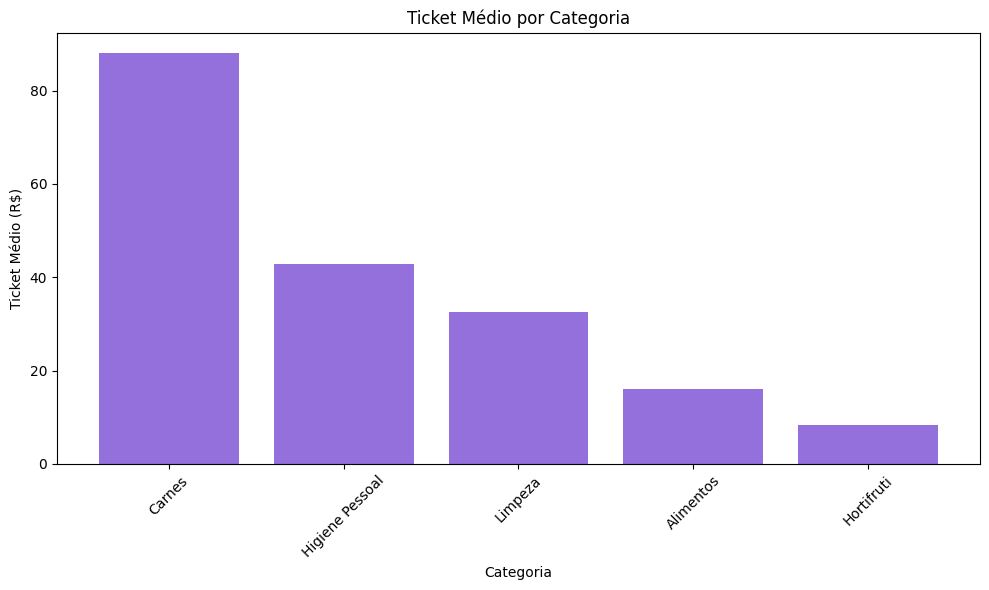

In [0]:
ticket_medio_categoria_pd = ticket_medio_categoria.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(ticket_medio_categoria_pd['Categoria'], ticket_medio_categoria_pd['Ticket_Medio'], color='mediumpurple')
plt.title('Ticket Médio por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


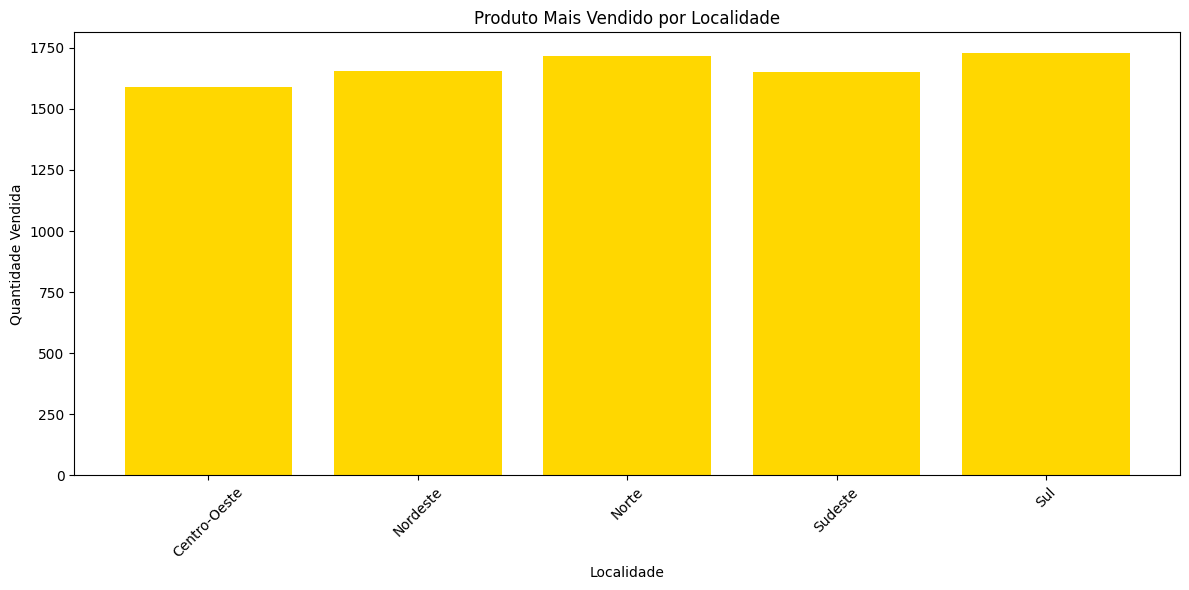

In [0]:
produtos_por_regiao_pd = produtos_por_regiao.toPandas()

top_produtos = produtos_por_regiao_pd.sort_values(['Localidade', 'Total_Quantidade'], ascending=[True, False])
top_produtos = top_produtos.groupby("Localidade").head(1)

plt.figure(figsize=(12, 6))
plt.bar(top_produtos['Localidade'], top_produtos['Total_Quantidade'], color='gold')
plt.title('Produto Mais Vendido por Localidade')
plt.xlabel('Localidade')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
%python
# Example definitions of the DataFrames
ticket_medio_categoria = spark.createDataFrame([
    (1, "Category1", 100.0),
    (2, "Category2", 200.0)
], ["id", "category", "average_ticket"])

produtos_por_regiao = spark.createDataFrame([
    (1, "Region1", "Product1"),
    (2, "Region2", "Product2")
], ["id", "region", "product"])

# Writing the DataFrames to parquet files
ticket_medio_categoria.write.parquet("dbfs:/mnt/elenir-oliveira/ticket_medio_categoria.parquet")
produtos_por_regiao.write.parquet("dbfs:/mnt/elenir-oliveira/produtos_por_regiao.parquet")